<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/P5_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset (Assuming the dataset is in CSV format)
data = pd.read_csv('Customer Purchase Data.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, we will drop rows with missing values (or use imputation if needed)
data = data.dropna()

# Selecting relevant columns (assuming the dataset has 'Age', 'Annual Income', and 'Spending Score' columns)
X = data[['Age', 'Income', 'Spending_Score']]

# Standardizing the data (important for K-Means clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling: \n", X_scaled[:5])


Number                  0
Age                     0
Income                  0
Spending_Score          0
Membership_Years        0
Purchase_Frequency      0
Last_Purchase_Amount    0
dtype: int64
Data after scaling: 
 [[ 1.01752226  1.03081734  1.03054622]
 [ 0.21935068  0.43182466  0.48858978]
 [-0.89808954 -0.70048049 -0.69480078]
 [ 1.33679089  1.4516717   1.48651106]
 [-0.41918659 -0.30513367 -0.27905597]]


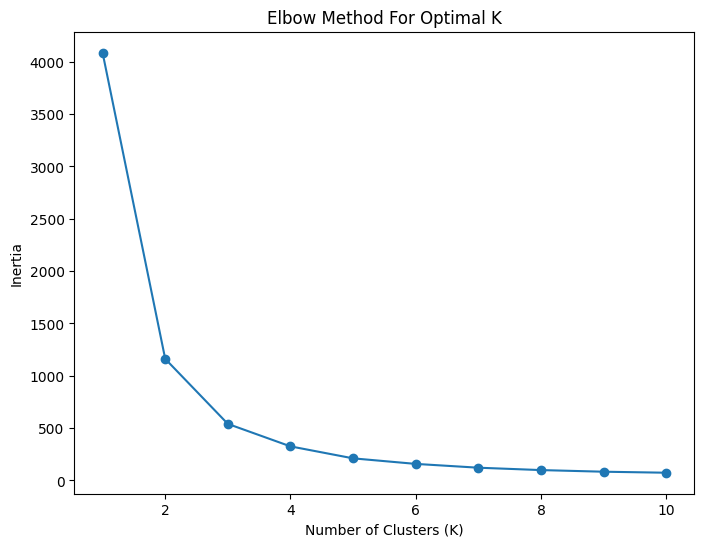

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Calculate inertia (within-cluster sum of squares) for different K values
inertia = []
K_range = range(1, 11)  # Test for K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [27]:
# Apply K-Means with the chosen number of clusters (let's assume K=5)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

print(data.head())


   Number  Age       Income  Spending_Score  Membership_Years  \
0       1   56  61350.84215    12372.864450                15   
1       2   46  53777.18224    11001.604230                10   
2       3   32  39460.32263     8007.385018                19   
3       4   60  66672.12210    13526.548370                12   
4       5   38  44459.08553     9059.304083                 9   

   Purchase_Frequency  Last_Purchase_Amount  Cluster  
0           77.685590           6232.122440        0  
1           51.858351           5545.849698        2  
2           98.166371           4054.645293        1  
3           62.530976           6815.544393        0  
4           46.470533           4617.833484        2  


<Figure size 800x600 with 0 Axes>

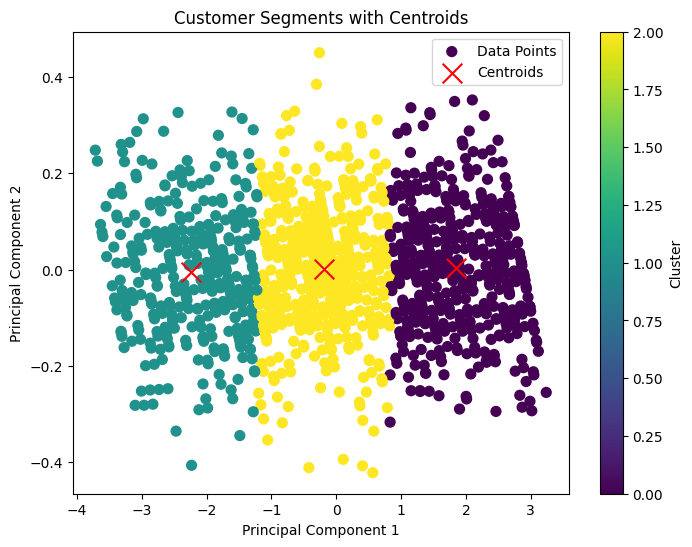

In [28]:
# Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))

# Use PCA to reduce the data to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Data Points')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='x', label='Centroids')

# Adding labels and title
plt.title('Customer Segments with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.colorbar(scatter, label='Cluster')
plt.show()

# X-axis: This represents the first principal component (PC1), which is the linear combination of the
# original features (Age, Annual Income, Spending Score) that explains the most variance.
# Y-axis: This represents the second principal component (PC2), which is orthogonal to PC1 and
# explains the next largest amount of variance in the data.

In [29]:
# Display the cluster centers (mean of the features for each cluster)
print("Cluster Centers (Age, Annual Income, Spending Score):")
print(kmeans.cluster_centers_)


Cluster Centers (Age, Annual Income, Spending Score):
[[ 1.06595969  1.06797715  1.06730843]
 [-1.29086825 -1.29039865 -1.28949383]
 [-0.11015503 -0.11250573 -0.11250651]]


In [30]:
# You can also explore the characteristics of each cluster:
for i in range(5):
    print(f"Cluster {i} Summary:")
    print(data[data['Cluster'] == i].describe())

Cluster 0 Summary:
            Number         Age        Income  Spending_Score  \
count   498.000000  498.000000    498.000000      498.000000   
mean    681.373494   56.566265  61796.226550    12461.058930   
std     398.487322    4.576274   4683.750796      943.648303   
min       1.000000   46.000000  53618.702860    10797.620350   
25%     334.750000   53.000000  57837.008987    11652.737927   
50%     673.500000   56.000000  61268.206035    12360.689135   
75%    1024.750000   61.000000  65660.248915    13214.426755   
max    1361.000000   64.000000  73182.569800    14791.611800   

       Membership_Years  Purchase_Frequency  Last_Purchase_Amount  Cluster  
count        498.000000          498.000000            498.000000    498.0  
mean          10.218876           53.006969           6281.122279      0.0  
std            5.453506           27.177783            473.986828      0.0  
min            1.000000            4.876052           5409.658439      0.0  
25%            5.00

**BONUS ASSIGNMENGT**

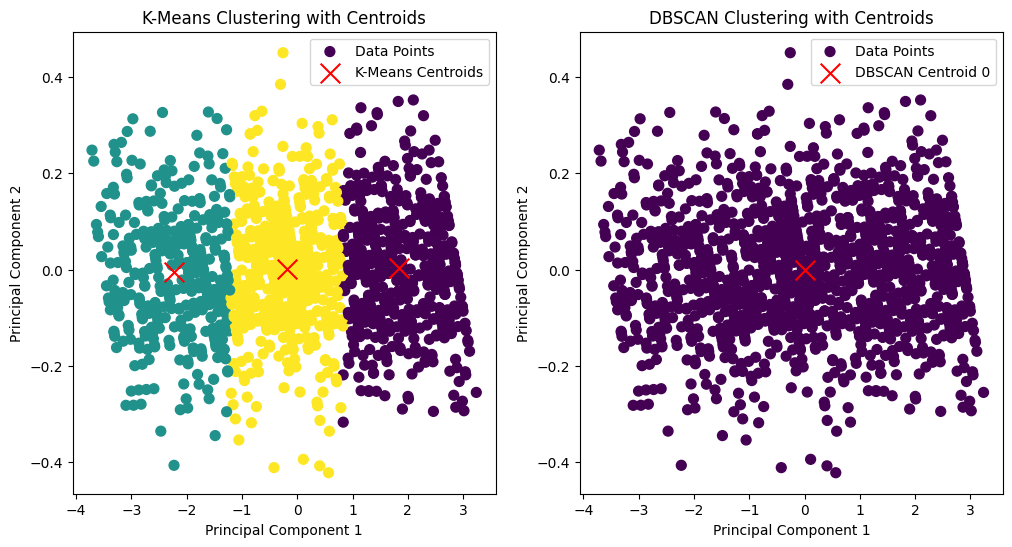

In [32]:
# Apply KMeans clustering (for comparison)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(12, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', s=50, label='Data Points')
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform KMeans centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='x', label='K-Means Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# DBSCAN Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis', s=50, label='Data Points')

# Calculate approximate centroids for DBSCAN (mean of points in each cluster)
for cluster_id in set(dbscan_clusters):
    if cluster_id != -1:  # Exclude noise points (label -1)
        cluster_points = X_pca[dbscan_clusters == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='x', label=f'DBSCAN Centroid {cluster_id}')

plt.title("DBSCAN Clustering with Centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()
